In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Loading the dataset into DataFrame
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

In [3]:
#Printing the first 5 Instances
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#display the number of rows and columns in our dataset
df.shape            #it contains 20640 rows 'instances' and 9 columns 'features' + one column for price




(20640, 10)

In [5]:

#check for any missing values
df.isnull().sum()           #it is clean but total_bedrooms Column has 207 NULLs so we need to handle it




longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:

df.total_bedrooms.fillna(df.total_bedrooms.mean(),inplace=True)

/tmp/ipykernel_18/2547799642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.total_bedrooms.fillna(df.total_bedrooms.mean(),inplace=True)


In [7]:
#now we want to make sure that the dataset is clean 
df.isnull().sum()    #yes it is clean now

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
#discover Columns data Type 
df.info()                           #All our columns have numerical values instead of 'ocean_proximity'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
#Instance Distributed in ocean_proximity Variable
df.ocean_proximity.value_counts()      #We Have 5 Categories

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
#Some Mathematical Measures
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
#Some Plottings
sns.set()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


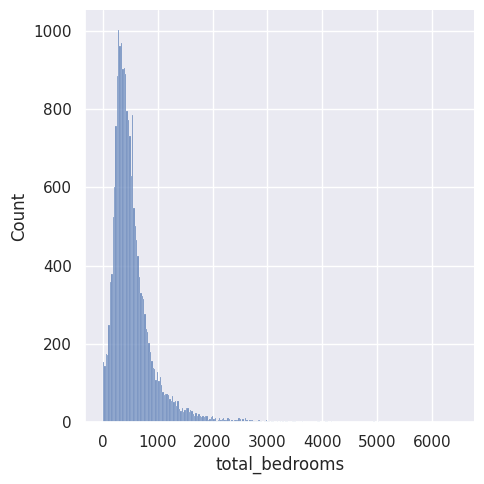

In [12]:
sns.displot(data=df,x='total_bedrooms')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


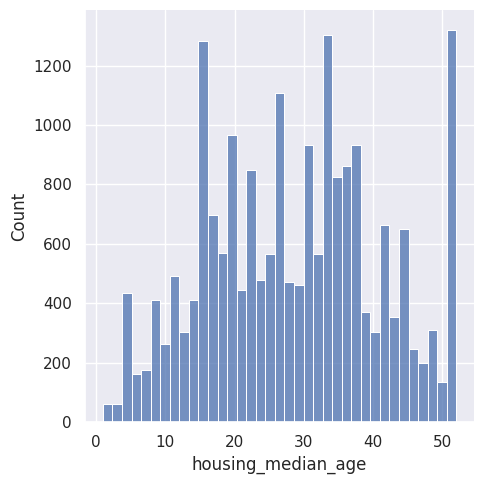

In [13]:
sns.displot(data=df,x='housing_median_age')

<Axes: xlabel='ocean_proximity', ylabel='count'>

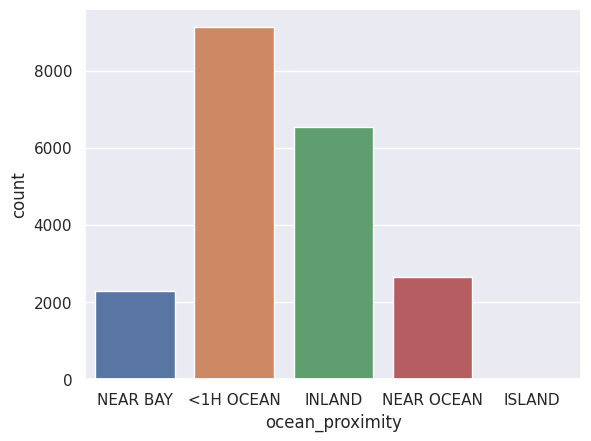

In [14]:
sns.countplot(data=df,x='ocean_proximity')

In [15]:
#Now let's Convert the Categorical Column into Numerical using Get dummies

df_dummies = pd.get_dummies(df['ocean_proximity'], prefix='ocean_proximity').astype(int)

# Add the new dummy columns to the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

# Display the modified DataFrame
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [16]:
#Drop the original Categorical Column
df.drop('ocean_proximity',axis=1,inplace=True)

In [17]:
#Now we have clean data with 0 NULLs and all columns are Numerical DataType

In [18]:
#splitting the dataset into features and Label
x=df.drop('median_house_value',axis=1)
y=df.median_house_value


In [19]:
#Splitting them into train and test 
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
#Using Standard Scaler to Normalize our Dataset
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
#Fitting The model
from xgboost import XGBRegressor
model = model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
#Model Evaluation

In [23]:
#Predicting on training data

In [24]:
predicted_train = model.predict(x_train)

In [25]:
r2_score=metrics.r2_score(y_train,predicted_train)
print('r2_score for Training is: ',r2_score)
mse = metrics.mean_absolute_error(y_train, predicted_train)
print('Mean Absolute error for training: ',mse)


r2_score for Training is:  0.9393343359961553
Mean Absolute error for training:  19981.96383087395


In [26]:
#Predicting on testing data

In [27]:
predicted_test = model.predict(x_test)

In [28]:
r2_score=metrics.r2_score(y_test,predicted_test)
print('r2_score for Testing is: ',r2_score)
mse = metrics.mean_absolute_error(y_test, predicted_test)
print('Mean Absolute error for testing: ',mse)



r2_score for Testing is:  0.8330030512703028
Mean Absolute error for testing:  31186.462683389353


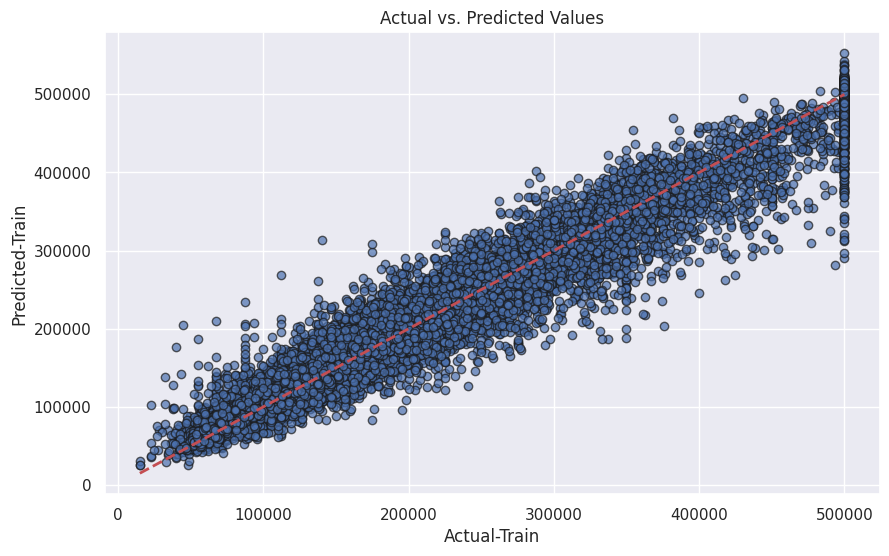

In [29]:


#Plot actual vs. predicted values For Training Data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predicted_train, alpha=0.7, edgecolors='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', linewidth=2)
plt.xlabel('Actual-Train')
plt.ylabel('Predicted-Train')
plt.title('Actual vs. Predicted Values')
plt.show()


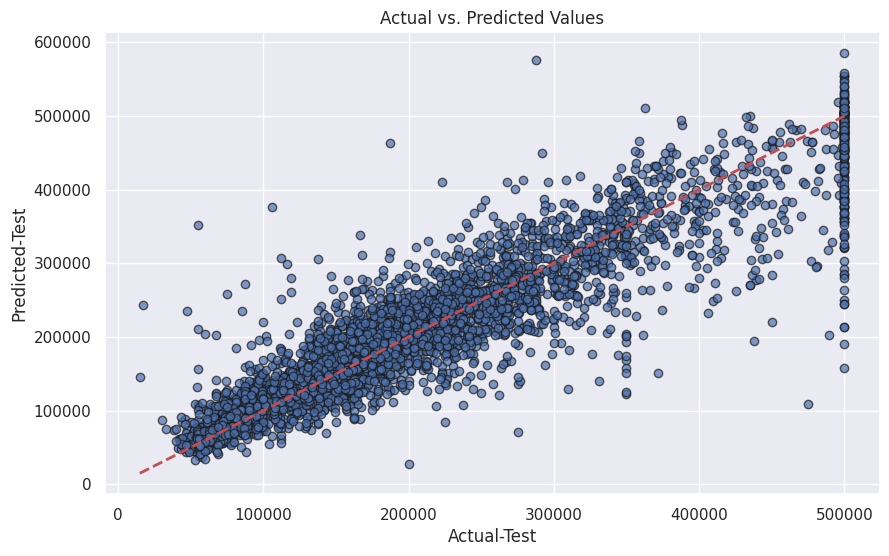

In [30]:
#Plot actual vs. predicted values For Testing Data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_test, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual-Test')
plt.ylabel('Predicted-Test')
plt.title('Actual vs. Predicted Values')
plt.show()




In [31]:
#r2_score for Training is:  0.9393343359961553
#Mean Absolute error for training:  19981.96383087395
#r2_score for Testing is:  0.8330030512703028
#Mean Absolute error for testing:  31186.462683389353

    
    #let's Go back and remove nulls instead of fill it with mean value